# Binary classification based on Logistic Regression using non-linear regression function

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data

In [2]:
fname_data1 = 'assignment_09_data1.txt'
fname_data2 = 'assignment_09_data2.txt'

data1 = np.genfromtxt(fname_data1, delimiter=',')
data2 = np.genfromtxt(fname_data2, delimiter=',')

# data[:,0] : x
# data[:,1] : y
# data[:,2] : label {0, 1}

## plot the data

In [3]:
# normallize
a = np.arange(1, 28, 1).reshape(3, 9)
print(a.mean(axis = 0))
print(a)
print(np.mean(a, axis = 1))
np.mean(data1[:, 2])

[10. 11. 12. 13. 14. 15. 16. 17. 18.]
[[ 1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18]
 [19 20 21 22 23 24 25 26 27]]
[ 5. 14. 23.]


0.5

In [4]:
def normalize(data):
    x_mean = np.mean(data[:, 0])
    y_mean = np.mean(data[:, 1])
    x_std = np.std(data[:, 0])
    y_std = np.std(data[:, 1])
    
    norm_x = (data[:, 0] - x_mean) / x_std
    norm_y = (data[:, 1] - y_mean) / y_std
    return norm_x, norm_y


## define the feature function for each data to obtain the best accuracy

In [5]:
# 첫번째 data를 위한 feature function
# 원 방정식
def feature_function1(x, y):
    data_num = len(x)
    
    feature = np.array([pow(x, 0), pow(x, 2), pow(y, 2), x, y])

    return feature

In [6]:
a = np.array([np.ones(100), np.zeros(100)])
a = np.ones(1000)
b = pow(data1[:, 0], 0)
print(a.shape)
type(b)

(1000,)


numpy.ndarray

In [7]:
x2 = data2[:, 0]
y2 = data2[:, 1]
k = feature_function2(x2, y2)
k.shape

NameError: name 'feature_function2' is not defined

In [8]:
a = np.array([np.ones(100)])
b = np.array([np.zeros(100)])
c = np.array([np.ones(100)])
d = np.empty((100, 1))
# d = np.hstack((d, a.reshape(1, 100).T))
# d = 

In [9]:
# 두번째 data를 위한 feature function
# 3차방정식
def feature_function2(x, y):
    data_num = len(x)
    feature = np.array([pow(x, 0), pow(x, 3), pow(x, 2), x, y])
    
    return feature

## define regression function with a vector $\theta$ model parameters and input data 

In [10]:
# feature의 수만큼, theta (model parameter)의 dimension이 결정이 됨.
# regression function의 함수는 model parameter와 feature function간의 linear combination으로 define됨. 
def regression_function(theta, feature):
    var_count = feature.shape[0]
    data_num = feature.shape[1]
    
    theta_vector = theta.reshape(1, var_count).T  
    # shape : var_count * 1 
    
    data_matrix = np.array([])
    for count in range(var_count):
        if count == 0:
            data_matrix = feature[count].reshape(1, data_num).T
        else:
            data_matrix = np.hstack((data_matrix, feature[count].reshape(1, data_num).T))
        # data_num * var_count shape
    
    value = np.dot(data_matrix, theta_vector)
    
    return value
    # shape : data_num * 1 (vertical vector)
    

In [11]:
test_feature = feature_function2(x2, y2)
test_theta = np.ones(5)
value = regression_function(test_theta, test_feature)
value.shape

(1000, 1)

## define sigmoid function with input $x$

In [12]:
def sigmoid(input_parameter):
    z = 1 / (1 + np.exp(-input_parameter))
    return z

In [13]:
def logistic_function(theta, feature):
    regression_value = regression_function(theta, feature)
    value = sigmoid(regression_value)
    return value
    # return value -> vertical vector value. (n * 1)

In [14]:
logistic_function(test_theta, test_feature).shape

(1000, 1)

## define loss function with feature and label based on the logistic regression

In [15]:
def compute_loss_feature(theta, feature, label):
    data_num = feature.shape[1]
    h_value = logistic_function(theta, feature)
    label = label.reshape(1, label.shape[0])
    
    left_part = np.dot(label, np.log(h_value))
    right_part = np.dot(1 - label, np.log(1 - h_value))
    
    loss = - (1 / data_num) * (left_part + right_part)
    loss = loss.flatten(order = 'F')
    
    return loss

In [16]:
test_loss = compute_loss_feature(test_theta, test_feature, data1[:, 2])
print(test_loss)

[1.21539802]


## define gradient vector for the model parameters $\theta$

In [17]:
def residual_function(theta, feature, label):
    h_value = logistic_function(theta, feature).flatten(order = "F")
    residual = h_value - label
    return residual 

In [18]:
residual_function(test_theta, test_feature, data1[:, 2]).shape

(1000,)

In [19]:
def compute_gradient_feature(theta, feature, label):
    var_count = feature.shape[0]
    data_num = feature.shape[1]
    
    theta_vector = theta.reshape(1, var_count).T  
    # shape : var_count * 1 
    
    data_matrix = np.array([])
    for count in range(var_count):
        if count == 0:
            data_matrix = feature[count].reshape(1, data_num).T
        else:
            data_matrix = np.hstack((data_matrix, feature[count].reshape(1, data_num).T))
        # data_num * var_count shape
    
    residual = residual_function(theta, feature, label)
    
    gradient = np.dot(residual, data_matrix) / data_num
    gradient = gradient.flatten(order = "F")
    
    return gradient

## compute the accuracy

In [20]:
def compute_accuracy(theta, feature, label):
    data_num = feature.shape[1]
        
    label_pred_01 = np.array([None] * data_num)
    
    label_pred = logistic_function(theta, feature).flatten(order = 'F')
    
    bool_label_0 = np.array(label_pred < 1/2)
    bool_label_1 = np.array(label_pred > 1/2)
    
    label_pred_01[bool_label_0] = 0
    label_pred_01[bool_label_1] = 1
    
    bool_accuracy = np.array(label_pred_01 == label)
    accuracy = bool_accuracy.sum() / data_num
    
    return accuracy

# data의 수로 나누어서 100% 가 완벽하게 맞으면 1, 모두가 틀리면 0이 나오게 accuracy를 계산하면 된다. 

In [21]:
a = np.array((2, 3, 1, 0, 7))
b = np.array([None] * 5)
bool_a = np.array(a > 1/2)
b[bool_a] = 2
b

array([2, 2, 2, None, 2], dtype=object)

In [22]:
print(compute_accuracy(theta2_optimal, feature2, label2))
print(compute_accuracy(theta1_optimal, feature1, label1))

NameError: name 'theta2_optimal' is not defined

## gradient descent for the model parameters $\theta$

In [23]:
# setting
num_iteration   = 30000         # USE THIS VALUE for the number of gradient descent iterations 
learning_rate   = 0.3           # USE THIS VALUE for the learning rate

theta1 = np.zeros(5)
theta2 = np.zeros(5)

x1 = data1[:, 0]
y1 = data1[:, 1]
label1 = data1[:,2]

x2 = data2[:, 0]
y2 = data2[:, 1]
label2 = data2[:,2]

feature1 = feature_function1(x1, y1)
feature2 = feature_function2(x2, y2)

theta_iteration1 = np.zeros((num_iteration, theta1.size))
loss_iteration1  = np.zeros(num_iteration)

theta_iteration2 = np.zeros((num_iteration, theta2.size))
loss_iteration2  = np.zeros(num_iteration)

In [24]:
# do iteration
for i in range(num_iteration):
    grad1 = compute_gradient_feature(theta1, feature1, label1)
    grad2 = compute_gradient_feature(theta2, feature2, label2)
    theta1 = theta1 - (learning_rate * grad1)
    theta2 = theta2 - (learning_rate * grad2)
    
    loss1 = compute_loss_feature(theta1, feature1, label1)
    loss2 = compute_loss_feature(theta2, feature2, label2)
    
    theta_iteration1[i] = theta1
    loss_iteration1[i] = loss1
    
    theta_iteration2[i] = theta2
    loss_iteration2[i] = loss2
#     print("iteration = %4d, loss = %5.5f" % (i, loss))

In [25]:
# derive optimal theta
theta1_optimal = theta1
theta2_optimal = theta2

In [26]:
print(theta1_optimal)
print(theta2_optimal)
print(loss1, loss2)

[-15.65054065   6.294866     1.88236461  -0.05689236   0.15669218]
[  8.32684901  12.4357847  -18.8629841   -3.72378331 -13.29958739]
[0.00524388] [0.01902141]


## compute accuracy of the classifiers

In [27]:
accuracy_classifier1 = compute_accuracy(theta1_optimal, feature1, label1)
accuracy_classifier2 = compute_accuracy(theta2_optimal, feature2, label2)

## plot the results

In [28]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    
    plt.title('loss')

    plt.plot(loss_iteration, color = 'red')


    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()
    

In [29]:
def plot_data(data):
    
    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('training data')
    
    x = data[:, 0]
    y = data[:, 1]
    label = data[:, 2]
    
    bool_label_0 = np.array(label == 0)
    bool_label_1 = np.array(label == 1)
    
    plt.scatter(x = x[bool_label_0], y = y[bool_label_0], color = 'blue', label = 'class 0')
    plt.scatter(x = x[bool_label_1], y = y[bool_label_1], color = 'red', label = 'class 1')

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [30]:

def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('model parameter')
    
    plt.plot(theta_iteration[:, 0], color = 'red', label = "theta 0")
    plt.plot(theta_iteration[:, 1], color = 'green', label = "theta 1")
    plt.plot(theta_iteration[:, 2], color = 'blue', label = "theta 2")
    plt.plot(theta_iteration[:, 3], color = 'purple', label = "theta 3")
    plt.plot(theta_iteration[:, 4], color = 'green', label = "theta 4")


    plt.xlabel('iteration')
    plt.legend(loc = "right")

    plt.tight_layout()
    plt.show()
    
    
    

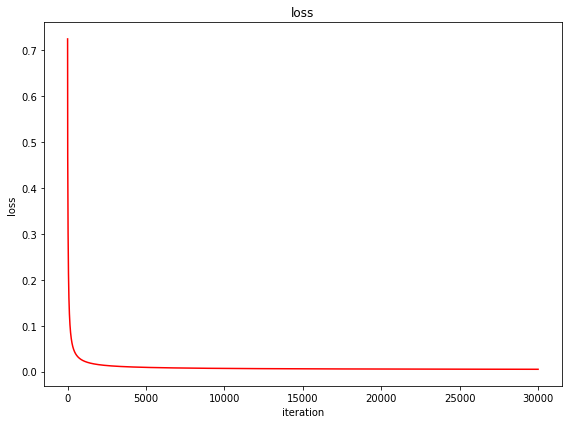

In [31]:
plot_loss_curve(loss_iteration1)

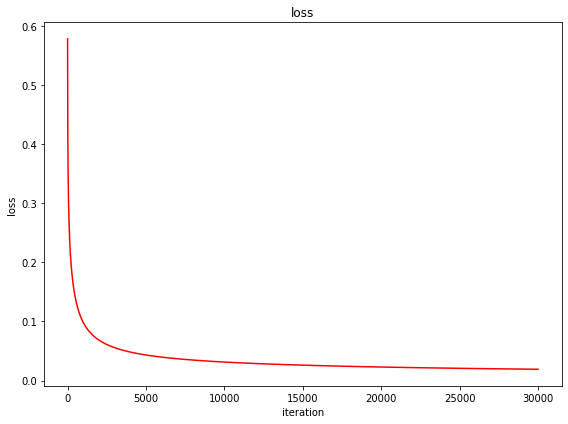

In [32]:
plot_loss_curve(loss_iteration2)

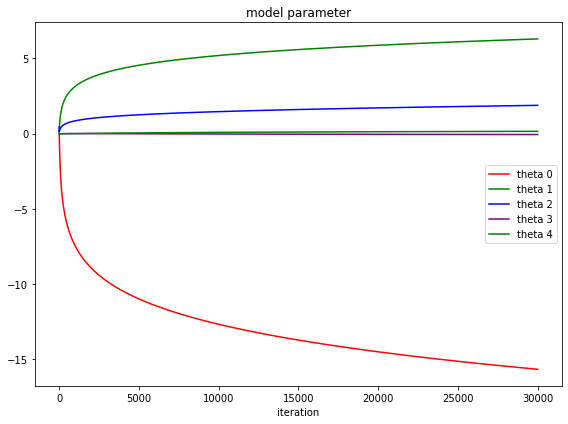

In [33]:
plot_model_parameter(theta_iteration1)

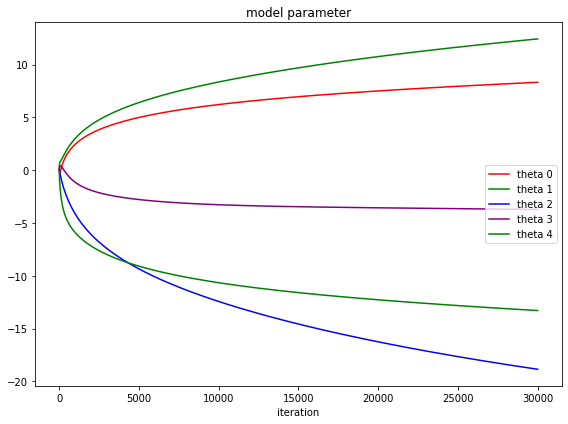

In [34]:
plot_model_parameter(theta_iteration2)

In [35]:
XX = np.arange(-2, 2, 0.1)
YY = np.arange(-2, 2, 0.1)
XX, YY = np.meshgrid(XX, YY)
ZZZ = feature_function1(XX, YY)

In [138]:
def plot_classifier1(data, theta):
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title("classifier1")
    
    x = data[:, 0]
    y = data[:, 1]
    label = data[:, 2]
    feature = feature_function1(x, y)
    
    XX = np.arange(-5, 5, 0.1)
    YY = np.arange(-5, 5, 0.1)
    
    XX, YY = np.meshgrid(XX, YY)
    feature_ZZ = feature_function1(XX, YY)
    ZZ = theta[0] * feature_ZZ[0] + theta[1] * feature_ZZ[1] + theta[2] * feature_ZZ[2] + theta[3] * feature_ZZ[3] + theta[4] * feature_ZZ[4]
    
#     ZZ = sigmoid(ZZ)
    
    
    label_pred = logistic_function(theta, feature).T.flatten(order = "F")
    
    bool_label_0 = np.array(label_pred < 1/2)
    bool_label_1 = np.array(label_pred > 1/2)
    
    cs = plt.contourf(XX, YY, ZZ, levels = 100, alpha = 0.5, cmap = "RdBu_r", extend = 'both')

    plt.scatter(x = x[bool_label_0], y = y[bool_label_0], color = 'blue', label = 'class 0')
    plt.scatter(x = x[bool_label_1], y = y[bool_label_1], color = 'red', label = 'class 1')
    
    plt.contour(cs, levels = [0.5, 0.5], colors = 'black')
    
    plt.colorbar(cs, label="Logistic Regression", orientation="vertical")
    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [118]:
def plot_classifier2(data, theta):
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    
    x = data[:, 0]
    y = data[:, 1]
    label = data[:, 2]
             
    feature = feature_function2(x, y)
    label_pred = logistic_function(theta, feature).T.flatten(order = "F")
    
    XX = np.arange(-2, 3, 0.1)
    YY = np.arange(-2, 2, 0.1)
    
    XX, YY = np.meshgrid(XX, YY)
    feature_ZZ = feature_function2(XX, YY)
    
    ZZ = theta[0] * feature_ZZ[0] + theta[1] * feature_ZZ[1] + theta[2] * feature_ZZ[2] + theta[3] * feature_ZZ[3] + theta[4] * feature_ZZ[4]
    

    bool_label_0 = np.array(label_pred < 1/2)
    bool_label_1 = np.array(label_pred > 1/2)
        
    cs = plt.contourf(XX, YY, ZZ, 100, alpha = 0.5, cmap = "seismic")
    
    plt.scatter(x = x[bool_label_0], y = y[bool_label_0], color = 'blue', label = 'class 0')
    plt.scatter(x = x[bool_label_1], y = y[bool_label_1], color = 'red', label = 'class 1')
    
    plt.contour(cs, levels = [0.5, 0.5], color = 'black')

    plt.colorbar(cs, label="Logistic Regression", orientation="vertical")
    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()


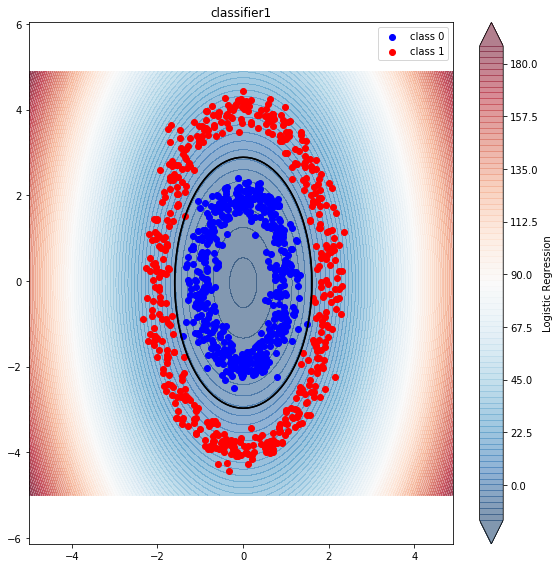

In [139]:
plot_classifier1(data1, theta1_optimal)

C:\Users\bluke\anaconda3\envs\py37_32\lib\site-packages\ipykernel_launcher.py:29: UserWarning: The following kwargs were not used by contour: 'color'


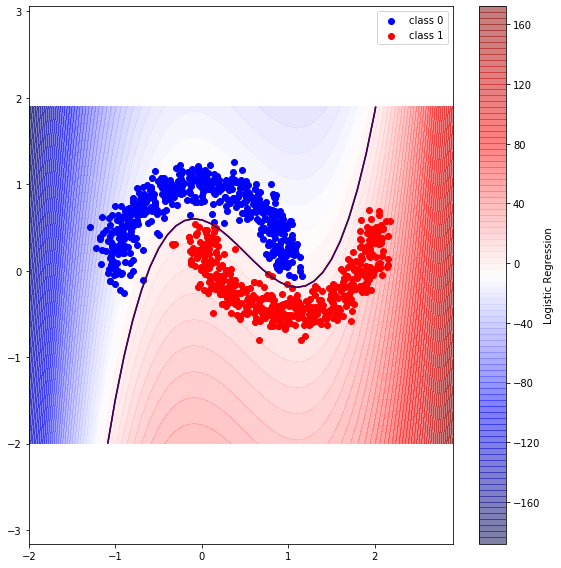

In [115]:
plot_classifier2(data2, theta2_optimal)

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data (data1) from the file [assignment_09_data1.txt] in blue for class 0 and in red for class 1

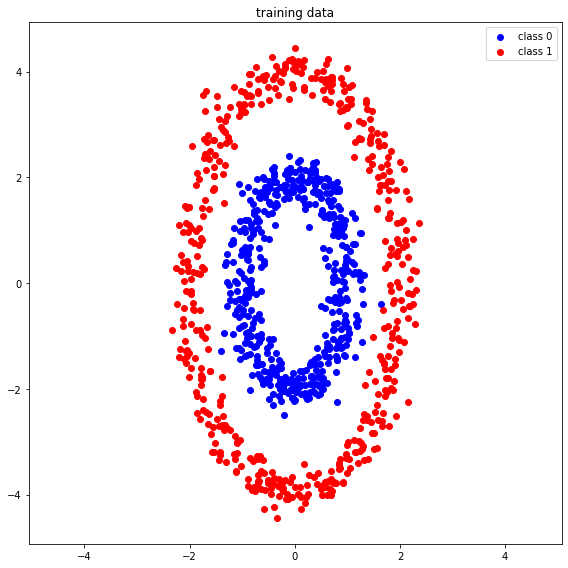

In [701]:
plot_data(data1)

### # 02. plot the input data (data2) from the file [assignment_09_data2.txt] in blue for class 0 and in red for class 1

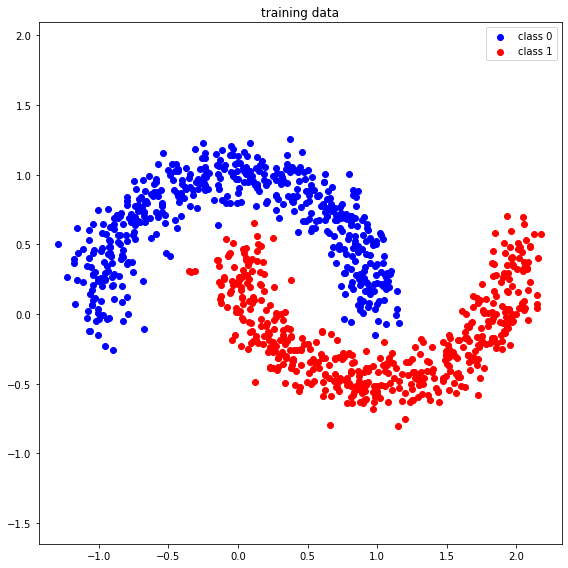

In [702]:
plot_data(data2)

### # 03. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors for data1

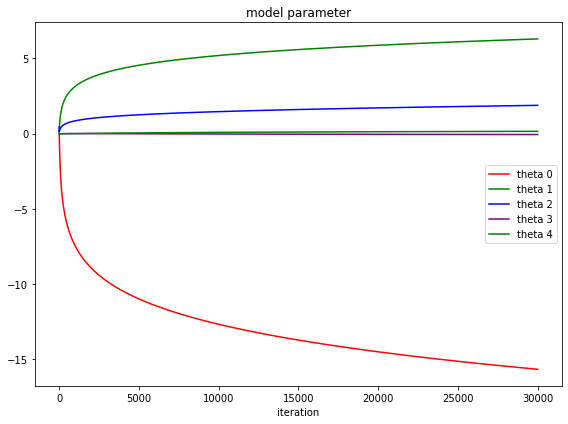

In [703]:
plot_model_parameter(theta_iteration1)

### # 04. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors for data2

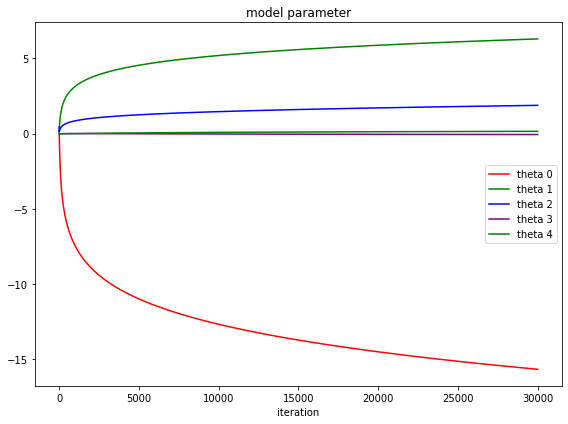

In [704]:
plot_model_parameter(theta_iteration1)

### # 05. plot the loss values in red curve over the gradient descent iterations for data1

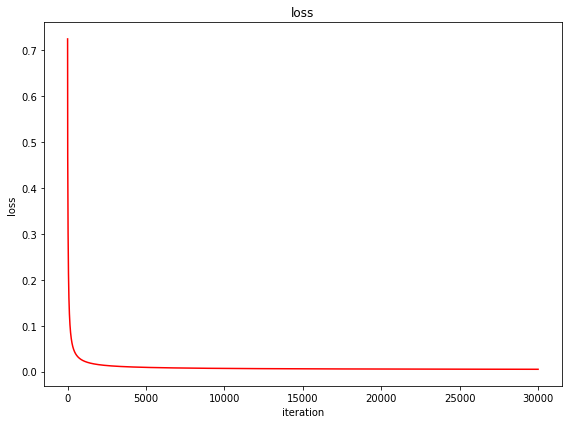

In [705]:
plot_loss_curve(loss_iteration1)

### # 06. plot the loss values in red curve over the gradient descent iterations for data2

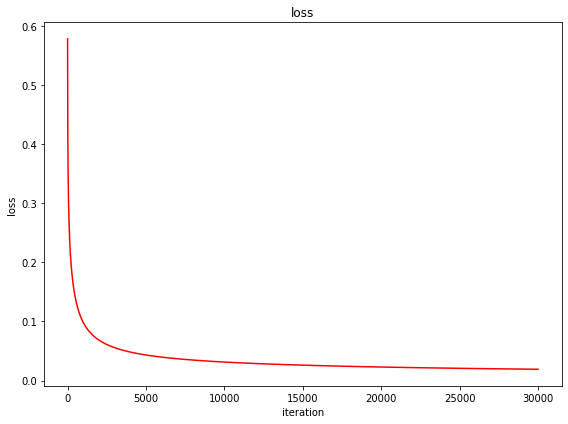

In [706]:
plot_loss_curve(loss_iteration2)

### # 07. plot the classifier with the given data points superimposed for data1

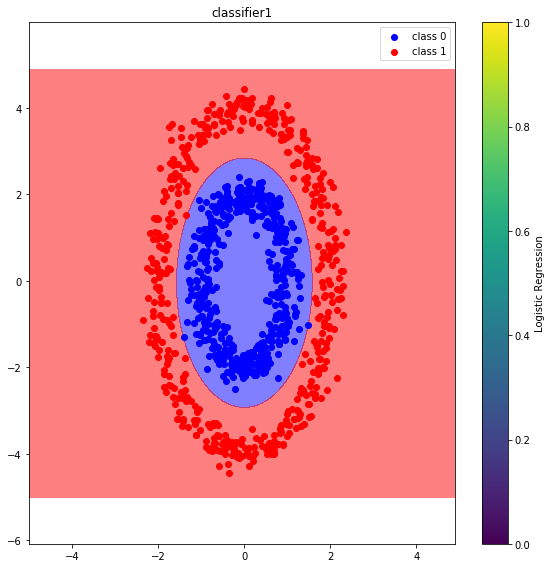

In [707]:
plot_classifier1(data1, theta1_optimal)

### # 08. plot the classifier with the given data points superimposed for data2

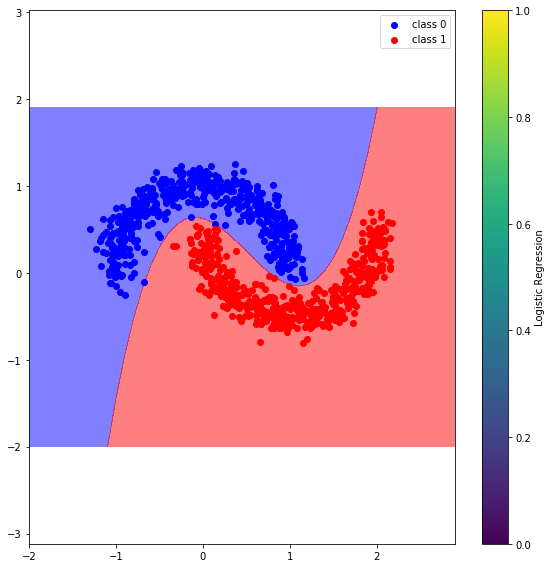

In [708]:
plot_classifier2(data2, theta2_optimal)

### # 09. print out the accuracy of the obtained classifier1 for data1

In [709]:
print(accuracy_classifier1)

0.998


### # 10. print out the accuracy of the obtained classifier2 for data1

In [710]:
print(accuracy_classifier2)

0.994
